In [49]:
reset -fs

  Exploring the Dataset - Houseprice and factors that might affect it
  ------

![House](House1.jpg)

My spouse and I live in San Jose, which is 2+hours commute to Galvanize, SF each way daily. I have been creating business cases to my spouse to move to SF for a while now, which usually results in this reaction...

![](spouse_fowl.jpg)

Or worst still...

![](angry_dog.jpg)

The reason being we want to own in SF area instead of renting.

I had always sold SF on its culture and lifestyle but never really analyzed the house prices based on the criteria that is important to us, so when I got this dataset I decided to take matters in my own hands.

"If a little knowledge is dangerous, where is the man who has so much as to be out of danger?"
-Thomas Huxley.

https://www.brainyquote.com/quotes/quotes/t/thomashuxl118368.html

Subjective and Objective Data Analysis 
------

I will share the objective analysis below.

Wanted to share the subjective one here. I took all the variables in this dataset, created an excel spreadhseet of it, sat down with my spouse, to identify the criteria that are important in a house to us, and noted them.

Next, I conducted the objective analysis below, to determine the factors/variables that affect saleprice of houses, and delve a bit more into details.

The results surprised me.
--

The project work in this kernel, that uses a dataset on houseprices, so I'm sharing how I applied some of the  data analysis principles to this problem.
The mindset and approach I have adopted for my analysis is as follows:

1) Understand the problem. We will look at each variable and perform analysis about their meaning and importance for this problem.

2) Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3) Bivariate and Multivariate study. We will analyze how the dependent variable and independent variables relate.

4) Create Probability scenarios with dataset like conditional probability, Bayes theorem, probability distributions, etc.

5) Exploring hypotheses  

There is also a paper that analyzed this data set which I found very insightful in building this project:

https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Importing Python Libraries needed for project
------

In [50]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 
import statsmodels.api as sm # Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
#from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Let us import, read and analyze the given datasets
------

In [51]:
sample_submission = pd.read_csv('sample_submission.csv')

In [52]:
sample_submission.head(n=3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [53]:
sample_submission.tail(n=3)

,Id,SalePrice
1456,2917,219222.423400
1457,2918,184924.279659
1458,2919,187741.866657


In [54]:
test = pd.read_csv('test.csv')

In [55]:
test.head(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [56]:
test.tail(n=3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [57]:
df_houseprices = pd.read_csv('train.csv')

In [58]:
df_houseprices.head(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [59]:
df_houseprices.tail(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [60]:
df_houseprices.info


<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [61]:
# analyzing the number of rows and columns in the data set we are analyzing.
df_houseprices.shape

(1460, 81)

Missing Data - Let us look into it a bit
------

From above dataset we see that there are NaNs in some columns. So let's see where exactly and how many.

How prevalent is the missing data?
Is missing data random or does it have a pattern?


The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This determine how accurate or dependable our analysis is. 

In [62]:
total = df_houseprices.isnull().sum().sort_values(ascending=False)
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [87]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


For now, lets just leave the missing data and do the analysis on the columns that have data.

Exploring the data set - Visualization - The usual suspects first - Histogram, Scatter Plot, Box Diagram
------

In [65]:
df_houseprices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [66]:
# The main goal we are after is the Sales price and how it relates to other variables.

# So, let us figure out the basic statistics of this dependent variable from our dataset.

In [67]:
df_houseprices['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So, the minimum price is 34,900 and maximum price is 755,000. This validates the legitimacy 
of the dataset i.e. it looks realistic or plausible as opposed to a dataset that would have a minimum that is negative value or even a zero.

Also, this dataset is based on Iowa houseprices, wish SF had houses available at just 755,000 dollars.

The house sale price is our data of interest, and the dependent variable 'Y' (using regression terms), so let us look into it a bit.

Saleprice and PDF
------

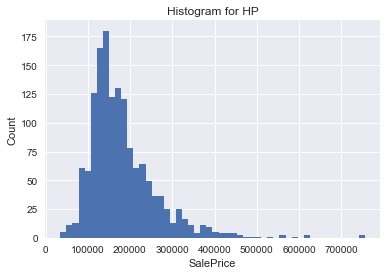

In [68]:
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Histogram for HP')
df_houseprices.SalePrice.hist(bins=50)

In [69]:
from numpy.random import normal
import numpy as np
from scipy.stats import norm

In [70]:
norm.fit(df_houseprices.SalePrice)

(180921.19589041095, 79415.291886067513)

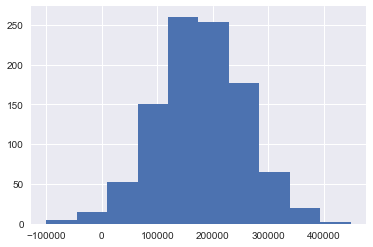

In [71]:
μ = 180921.196
σ = 79415.292
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

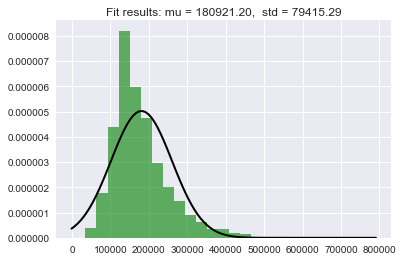

In [72]:
# Plot the histogram.
plt.hist(df_houseprices.SalePrice, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

# From class lab 3.2

/Users/eli/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


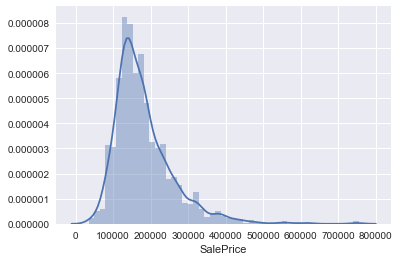

In [73]:
#Plotting a histogram using Seaborn - to check 
sns.distplot(df_houseprices['SalePrice']);

Some observations made from drawing the histogram above and fitting the normal distribution to it:

1) The saleprice histogram data deviates from the normal distribution, but still looks like a decent fit. So we will keep it.

2) Has positive skewness.

3) Demonstrates peakedness.

In [74]:
#Let us measure the house sales price curve characteristics: skewness and kurtosis
print("Skewness: %f" % df_houseprices['SalePrice'].skew())
print("Kurtosis: %f" % df_houseprices['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.


Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

The histogram amd probability distribution functions(PDF) can be explored more for every other variable other than Saleprice. For the sake of this particular data exploration, Saleprice was of utmost importance to me.
---

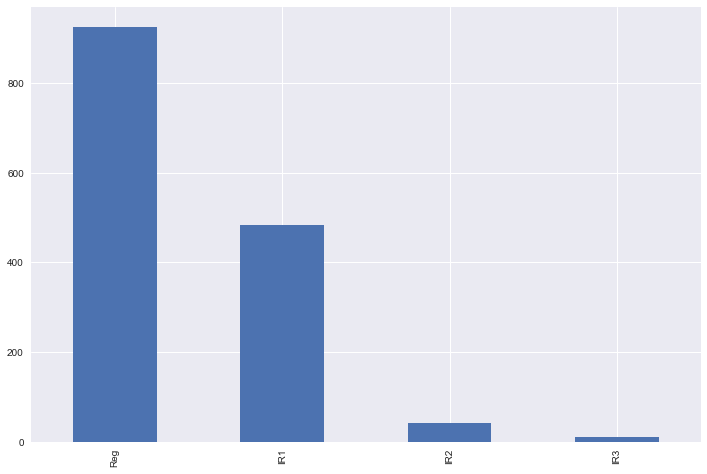

In [75]:
# Plotting a bar chart for categorical value = Lot shape
#Categorical variables are variables we can count like say lot shape.
#Numerical variables will be something like price.

plt.figure(figsize=(12,8))
df_houseprices.LotShape.value_counts().plot(kind='bar');

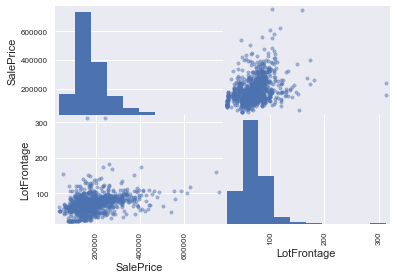

In [76]:
scatter_matrix(df_houseprices[["SalePrice", "LotFrontage"]],
              diagonal='hist');

After plotting the scatter matrix for Lotshape vs. Saleprice I realized this can be repeated for all variables, which can become cumbersome. To zero in on actual variables,or as my spuse will say - "Honey all you need to do is focus", I decided to identify the variables that actually matter to my topic of interest the Saleprice.

Correlation Matrix or The Heat Map
------

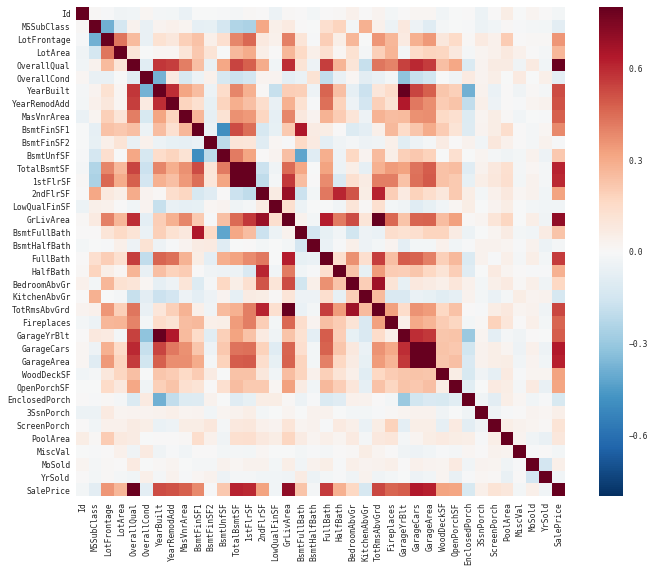

In [77]:
#correlation matrix
#http://seaborn.pydata.org/examples/many_pairwise_correlations.html
#http://seaborn.pydata.org/examples/network_correlations.html
sns.set(context="paper", font="monospace")
corrmat = df_houseprices.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(260, 10, as_cmap=True)
# # Drawing the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True);


Analyzing the heatmap, the variables that stand out to me are:

1)'TotalBsmtSF'and 'IstFlrSF' 

2)'GarageCars' and 'GarageArea' 

3)'YearBuilt' and 'YearRemodAdd'

4) 'GrLivArea'

5) 'OverallQual'
 

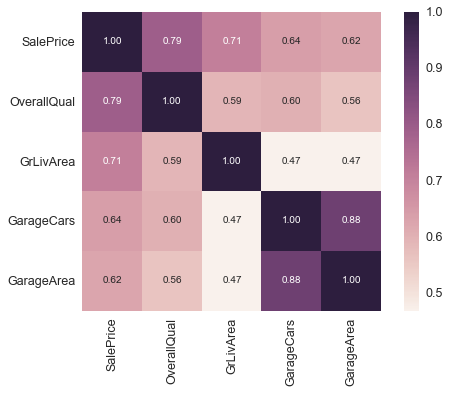

In [78]:
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_houseprices[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


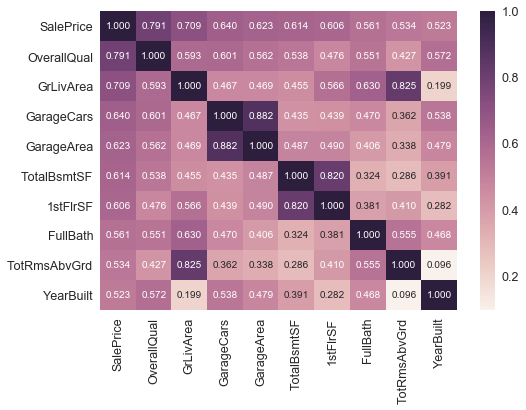

In [81]:
#Annotated heatmap to associate values to the variables
#https://seaborn.pydata.org/examples/heatmap_annotation.html
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_houseprices[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The independent variables that are strongly correlated to Salesprice are:

1)OverallQual'   = 0.791

2)'GrLivArea'    = 0.709, 'TotRmsAbvGrd'=0.534

3)'TotalBsmtSF'  =0.614

4)a)'GarageCars' = 0.640
  b)'GarageArea' = 0.623

  
5)1stFlrSF: First Floor square feet

  TotalBsmtSF: Total square feet of basement area
 
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. Let us keep 'TotalBsmtSF'.
6)'FullBath' = 0.561

7)''YearBuilt'=0.534.... well, later on a time series analysis of this might help shed more light.
   

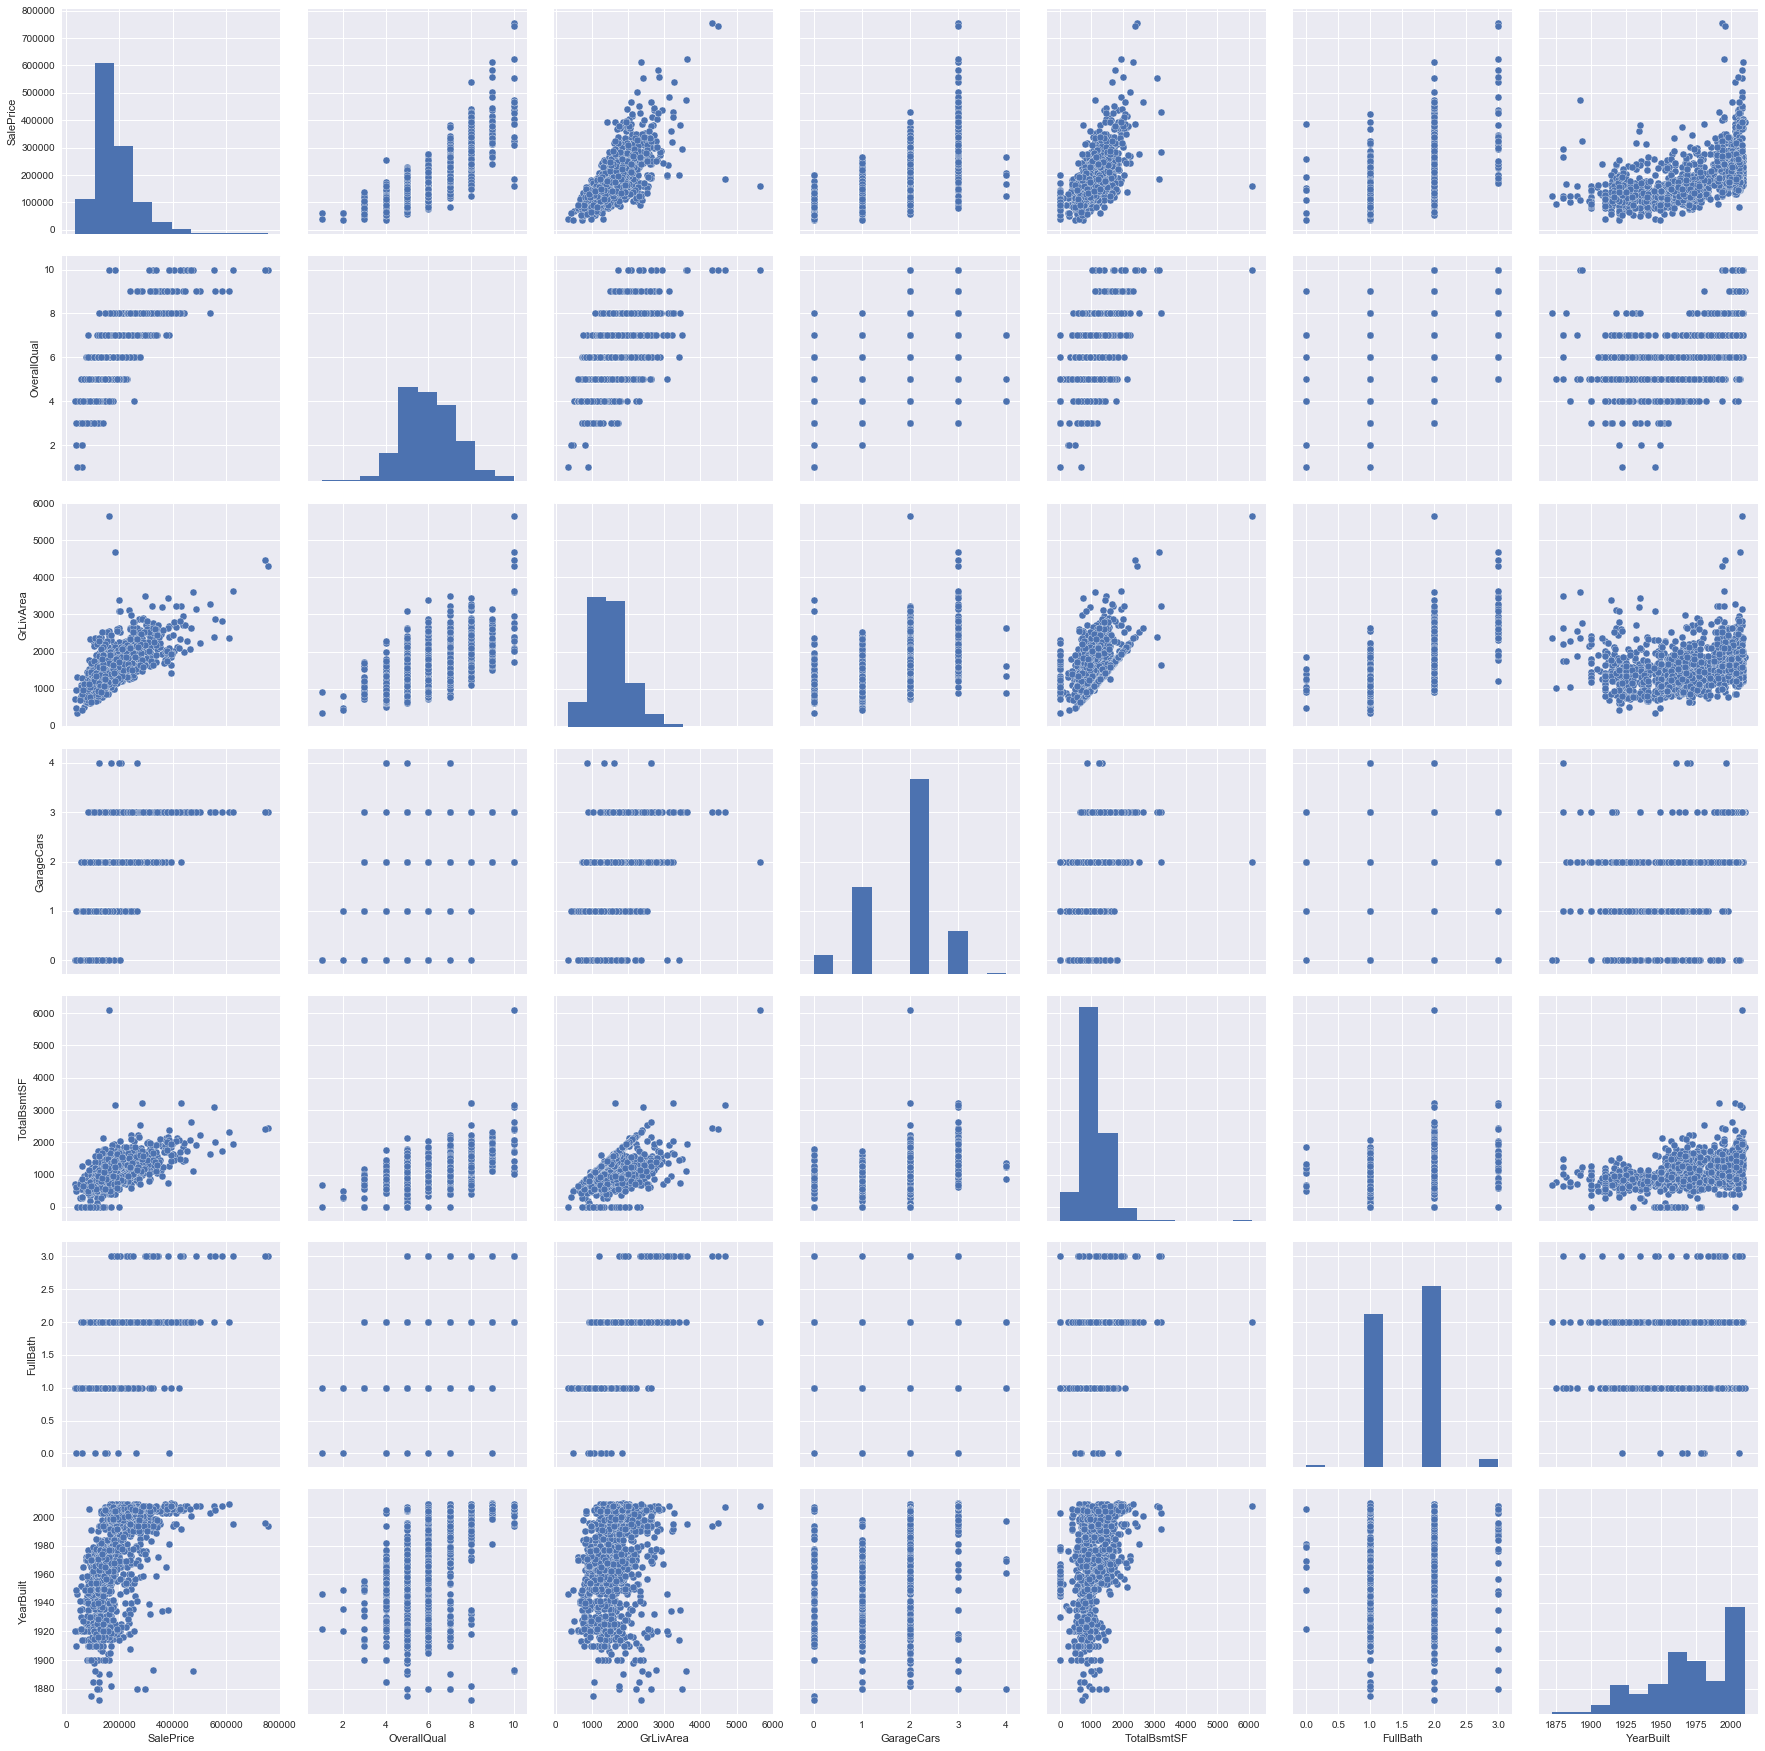

In [32]:
#Scatterplot
#https://seaborn.pydata.org/examples/scatterplot_matrix.html
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_houseprices[cols], size = 3.5)
plt.show();

The mega scatter plot gives us a reasonable idea about variables relationships.


Let us look at 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. 

Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.


The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. Looks like an exponential function. 



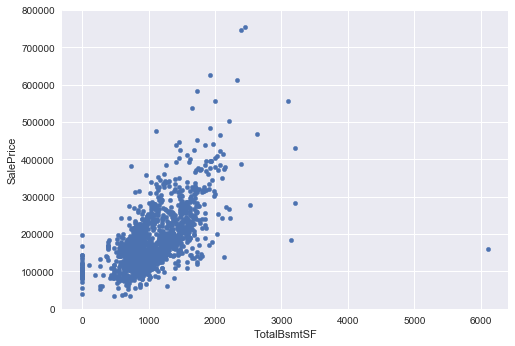

In [30]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

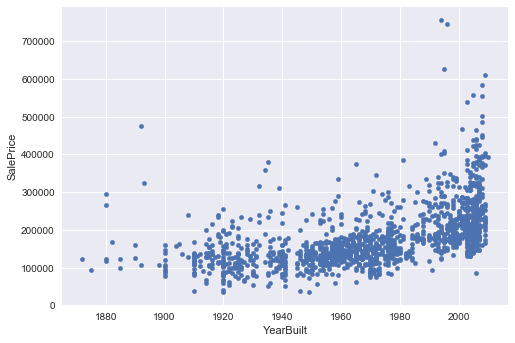

In [86]:
df_houseprices.plot(x='YearBuilt',   
           y='SalePrice',
           kind='scatter');

In [88]:
#box plot overallqual/saleprice
#http://www.physics.csbsju.edu/stats/box2.html
#http://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots


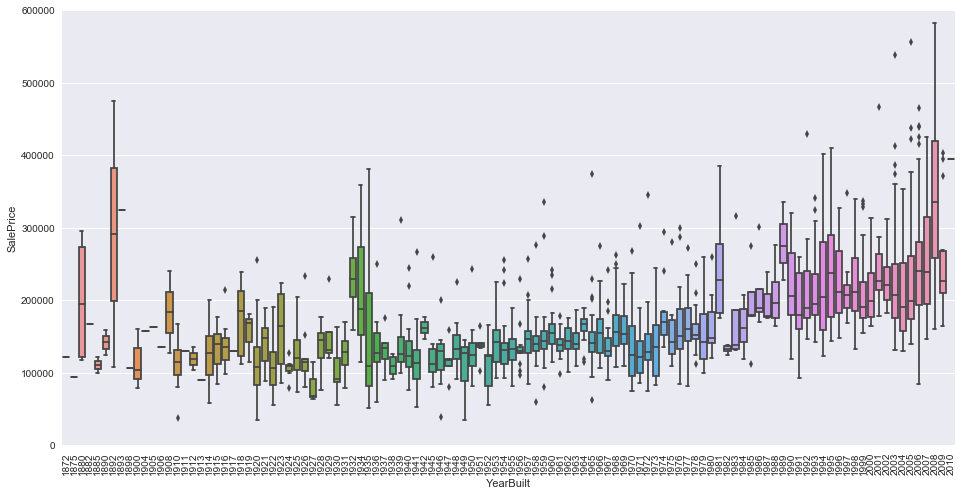

In [85]:
var = 'YearBuilt'
data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=va
                  
                  
                  
                  
                  r, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=600000);
plt.xticks(rotation=90);

GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.



'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.


We just analysed a few variables, but there are many other that we should analyse. 



The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

Probability Scenarios - Playing around with a few different probability scenarios with given dataset
------

In [34]:
# Let us create some probability scenarios based on given data set and explore the data further.

In [42]:
# Scenario 1
# I have wanted to live in SF forever, my spouse has not.
# I have created a business case to spouse that after having kids we will never want to live in sf as it is not affordable.

# That is where the probablity scenario comes from, below:)

300 SF Galvanize members were asked about their house preferences in 2017. Of the respondents, 33% had children. The respondents were asked what sort of house they would like if they could choose any house at all. 13% of respondents had children and chose a house with larger basement area. 12% of respondents did not have children and chose a smaller basement area. Find the probability that a randomly chosen respondent:

a) would choose a house with larger basement area;

$$P(\text{chose a large basement area}) = 0.13 + 0.12 = 0.25$$

b) either has children or would choose a larger basement house (or both).

$$P(\text{has children or chose a house with large basement}) = 0.33 + 0.25 - 0.13 = 0.33 + 0.12 = 0.45$$

Let us write a function that will generate random data according to the statistics describe above. We call our DataFrame `houseprices` and our columns `children` and `house_w_bsement` respectively, to get something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>house_w_bsement</th>
      <th>False</th>
      <th>True</th>
      <th>All</th>
    </tr>
    <tr>
      <th>children</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>False</th>
      <td>164</td>
      <td>36</td>
      <td>200</td>
    </tr>
    <tr>
      <th>True</th>
      <td>61</td>
      <td>39</td>
      <td>100</td>
    </tr>
    <tr>
      <th>All</th>
      <td>225</td>
      <td>75</td>
      <td>300</td>
    </tr>
  </tbody>
</table>



In [35]:
from numpy.random import random_sample

In [36]:
def houseprices_sample(r): 
    if r <= .2:
        return {"children": True, "house_with_basement": False}
    elif r <= .33:
        return {"children": True, "house_with_basement": True}
    elif r <= .45:
        return {"children": False, "house_with_basement": True}
    else:
        return {"children": False, "house_with_basement": False}

In [38]:
houseprices = pd.DataFrame(list(map(houseprices_sample, random_sample(300))))
houseprices.head()

,children,house_with_basement
0,False,False
1,False,False
2,True,False
3,True,False
4,False,False


In [39]:
pd.crosstab(houseprices.children, houseprices.house_with_basement, margins=True)

house_with_basement,False,True,All
children,,,
False,167,32,199
True,63,38,101
All,230,70,300


In [41]:
#Scenario 2 - Conditional Probability

Eli has submitted an offer for a house in SF after doing analysis on given dataset. He estimates that there is an 80 percent chance that he will get the house if there are only 2 other offers on the house, a 40 percent chance if there are 4 offers, and a 10 percent chance if there are greater than 4 offers on the house. He further estimates that the probabilities that the no. of offers will be 2, 4, and more are .7, .2, and .1, respectively


How certain is Eli that his offer  will be accepted?
   

>   This can be viewed using a probability tree. There are three options on the offer on the house:

> Case 1... 2 more offers 0.7               
	- house    0.8
	- no house 0.2  

> Case 2... 4 more offers 0.2                  
	- house  	0.4
	- no house  0.6 

> Case 3... 4 or more houses 0.1
	- house     0.1                                  
    - no house  0.9                                                            
                                     
>   So his certainty in getting the house is the sum of all the house nodes:
   P(house) = 0.7*0.8 + 0.2*0.4 + 0.1*0.1 = 0.65


   

(b)  Given that his offer on house does get accepted, how likely should he feel that there were 2 more offers? 4 more offers? 4 or more offers?

        
>   P(A|B) = (P(B|A) * P(A)) / P(B)

>  In this case we know P(offer|acceptance status), P(acceptance status), and P(house) so
   P(acceptance status|house) = P(house|acceptance status) * P(acceptance status)/P(house)

>   P(2 other offers| got house) = [0.8 * 0.7] / 0.65 = 0.8615
>   P(4 other offers | got house)    = [0.4 * 0.2] / 0.65 = 0.1231
>   P(> 4 offers | got house)   = [0.1 * 0.1] / 0.65 = 0.0154


  

(c)  Given that Eli's offer does NOT get accepted, how likely should he feel that he had 2 other offers to compete with? 4 other offers to compete with? 4 or more offers to compete with?


>   Same equation as above, but using P(no house) instead of P(house) in each 
   location.
>   P(no house) = 1 - P(house) = (1 - 0.65) = 0.35

>   P(2 other offers | no house) = [0.2*0.7] / 0.35 = 0.4 
>   P(4 other offers | no house) =    [0.6*0.2] / 0.35 = 0.3429
>   P(more than 4 offers | no house) =   [0.9*0.1] / 0.35 = 0.2571

Stepping into Regression - Let us work with some GLM models
------

Linear Regression
------

In [34]:
# First let us explore linear regression for houseprice vs. the 4 variables we found useful.

We could explore Linear regression for all variables vs. Saleprice to see how they affect saleprice individually (R squared) and also verify if the independent variables selected
are statistically significant (p-value....the lower they are for the corresponding variables
the more statistically significant they are).

We could also play around with Saleprice and how 2 variables together will affect it 
when one of the variables is held fixed and so on.

In [35]:
import statsmodels.api as sms

In [36]:
df_houseprices.plot(x='TotalBsmtSF',   
           y='',SalePrice
           kind='scatter');

SyntaxError: invalid syntax (<ipython-input-36-e2a8f795d866>, line 3)

In [37]:
X = df_houseprices.TotalBsmtSF
X = sms.add_constant(X)
y = df_houseprices.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          9.48e-152
Time:                        02:30:30   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        6.343e+04   4286.892     14.796      0.000       5.5e+04  7.18e+04
TotalBsmtSF   111.1096      3.745     29.671      0.000       103.764   118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* $R^2$: The model explains 37.6% of the variability of Saleprice (y).

* $\hat{\beta}_0$: If we don't have any Totalbasemnt factor in the picture, we would expect Saleprice (y) to be 6.34 exponentially raised to power of 4. In other words it is very small.

* $\hat{\beta}_{TotalBsmtSF}$: For each &#36;1,000 increase in Saleprice, Saleprice (y) increases by 111 on average.



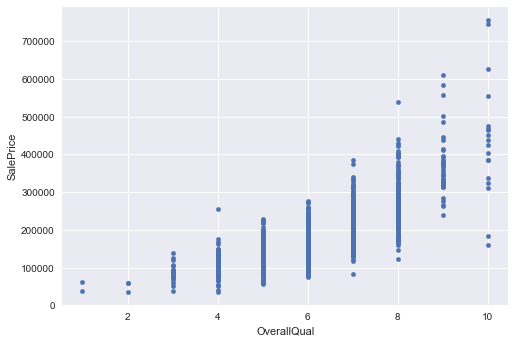

In [38]:
df_houseprices.plot(x='OverallQual',   
           y='SalePrice',
           kind='scatter');

In [39]:
X = df_houseprices.OverallQual
X = sms.add_constant(X)
y = df_houseprices.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          2.19e-313
Time:                        02:30:32   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000     -1.07e+05 -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000      4.36e+04  4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $R^2$: The model explains 62.6% of the variability of Saleprice (y).

* $\hat{\beta}_0$: If we don't have any Overallquality factor in the picture, we would expect Saleprice (y) to be -9.621 exponentially raised to power of 4. In other words it is very small.





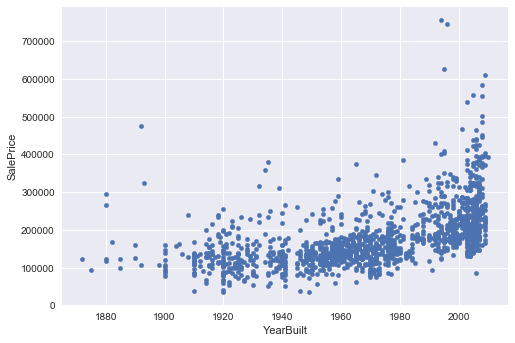

In [40]:
df_houseprices.plot(x='YearBuilt',   
           y='SalePrice',
           kind='scatter');

In [41]:
X = df_houseprices.YearBuilt
X = sms.add_constant(X)
y = df_houseprices.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          2.99e-103
Time:                        02:30:34   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.000     -2.76e+06  -2.3e+06
YearBuilt   1375.3735     58.717     23.424      0.000      1260.194  1490.553
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Similar to above.

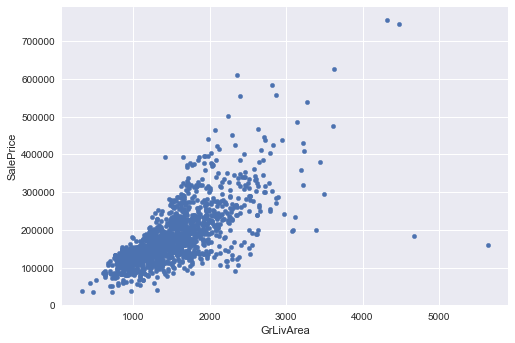

In [42]:
df_houseprices.plot(x='GrLivArea',   
           y='SalePrice',
           kind='scatter');

In [43]:
X = df_houseprices.GrLivArea
X = sms.add_constant(X)
y = df_houseprices.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          4.52e-223
Time:                        02:30:35   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000      9779.612  2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000       101.650   112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X = df_houseprices.GarageCars
X = sms.add_constant(X)
y = df_houseprices.SalePrice

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1014.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          2.50e-169
Time:                        02:30:36   Log-Likelihood:                -18159.
No. Observations:                1460   AIC:                         3.632e+04
Df Residuals:                    1458   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6.062e+04   4102.261     14.777      0.000      5.26e+04  6.87e+04
GarageCars  6.808e+04   2138.212     31.839      0.000      6.39e+04  7.23e+04
==============================================================================
Omnibus:                      590.054   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.044
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      11.527   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Similar to other variable explanations above.

Multiple Regression 
------

In [ ]:
#Multiple Regression

In [46]:
import statsmodels.formula.api as smf

In [47]:
#GrLivArea: Above grade (ground) living area square feet
model = 'SalePrice ~ GrLivArea + OverallQual + TotalBsmtSF + YearBuilt +GarageCars'
smf.ols(formula=model, data=df_houseprices).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     962.4
Date:                Fri, 10 Mar 2017   Prob (F-statistic):               0.00
Time:                        02:31:48   Log-Likelihood:                -17478.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1454   BIC:                         3.500e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    -6.72e+05   8.49e+04     -7.920      0.000     -8.38e+05 -5.06e+05
GrLivArea      50.8315      2.564     19.825      0.000        45.802    55.861
OverallQual  2.039e+04   1156.435     17.633      0.000      1.81e+04  2.27e+04
TotalBsmtSF    29.9779      2.821     10.628      0.000        24.445    35.511
YearBuilt     301.4334     44.591      6.760      0.000       213.964   388.902
GarageCars   1.451e+04   1823.547      7.957      0.000      1.09e+04  1.81e+04
==============================================================================
Omnibus:                      437.776   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45052.102
Skew:                          -0.280   Prob(JB):                         0.00
Kurtosis:                      30.208   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion from Multiple Regression
---
The 5 parameters have low P values, so they are definitely statistically significant & help determine the sale price well!

Perform Hypothesis Testing
------

Let us go over the steps for performing Hypothesis testing before using that on our dataset.

Hypothesis testing steps
------

1. State the null and alternative hypotheses (There is an initial research hypothesis of which the truth is unknown) 

2. Choose a significant level $\alpha$ (usually 0.05)  

3. Calculate the test statistic  

4. Compute the p-value  

5. Make your decision

https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

There is an initial research hypothesis of which the truth is unknown.

The first step is to state the relevant null and alternative hypotheses. This is important, as mis-stating the hypotheses will muddy the rest of the process.


The second step is to consider the statistical assumptions being made about the sample in doing the test; for example, assumptions about the statistical independence or about the form of the distributions of the observations. This is equally important as invalid assumptions will mean that the results of the test are invalid.


Decide which test is appropriate, and state the relevant test statistic T.


Derive the distribution of the test statistic under the null hypothesis from the assumptions. In standard cases this will be a well-known result. For example, the test statistic might follow a Student's t distribution or a normal distribution.


Select a significance level (α), a probability threshold below which the null hypothesis will be rejected. Common values are 5% and 1%.


The distribution of the test statistic under the null hypothesis partitions the possible values of T into those for which the null hypothesis is rejected—the so-called critical region—and those for which it is not. The probability of the critical region is α.


Compute from the observations the observed value tobs of the test statistic T.


Decide to either reject the null hypothesis in favor of the alternative or not reject it. 

The decision rule is to reject the null hypothesis H0 if the observed value tobs is in the critical region, and to accept or "fail to reject" the hypothesis otherwise.

In [45]:
#Hypothesis testing example

The opinion poll shows that the Houses with pools have 55% favor amongst buyers. You want to know if the true percentage is different from 55%.  

Let $p$ be the true love for houses with homes.  

$H_0: p = 0.55$  
$H_a: p \neq 0.55$  

(Null hypothesis: proportion of buyers loving houses with pools is 55%. Alternative hypothesis: People's support for houses with homes is different from 55%, i.e. either greater or less than 55%.)  

   

In [82]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest


In [84]:
fat = pd.read_csv(path+'../train.csv')
fat_t_statistic, fat_two_tailed_p_value = ttest_1samp(fat['0'], 20)
print(f't-test statistic: {fat_t_statistic:.2}')

lower_p_value = fat_two_tailed_p_value / 2
print(f'p-value: {lower_p_value:.2}')

NameError: name 'path' is not defined

Since the p-value is below alpha, we reject the null hypothesis.

We have extremely strong evidence that the support rate for the houses with pools is different from 55%.

The realtor company in chrge of selling the houses in this region claim that the average time a customer waits on hold is less than 5 minutes. A sample of 35 customers has an average wait time of 4.78 minutes with a standard deviation for wait time is 1.8 minutes. Test the company's claim.

Conclusion
------

1) Saleprice is normally distributed, the sale price is related majorly to a few dependent variables.

2) The year the house was builtrenovated and the garage area are definitely two of the most obvious determing factors in the Saleprice of the house. 

3)Overall quality of the house, on afterthought also is a determining factor. Now, one way to actually buy an affordable house could be to buy a house that is not in the best shape, and then work on it, to help bring its price up. In layman's terms, the "fixer-upper."

4)The living area of square footage of the house obviously determines the saleprice on the house. Spouse and I go back and forth on how much space we need. Might be a good idea to look at house prices close to SF as opposed to just within SF, and compare this particular variable and its impact on house price.

5)It is interesting that the subjective analysis I did on spreadsheet with spouse on factors that are important to us, are also the factors that majorly determine the sale price of a house, as per this dataset.

Final Thoughts
------

Well, this analysis makes me feel more prepared to have another chat with my spouse.

I can only play the REALLY nice, loving, husband that I am... and hope for the best :)


![](scared_dog.jpg)